<a href="https://colab.research.google.com/github/sivaaninraj/Covid-19-V2-/blob/master/SrcCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12


import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import os
import re
import glob
import requests 
from bs4 import BeautifulSoup
import json

In [ ]:
# get data
link = 'https://www.mohfw.gov.in/'
req = requests.get(link)
soup = BeautifulSoup(req.content, "html.parser")

In [ ]:
# get the table head
thead = soup.find_all('thead')[-1]
# print(thead)

# get all the rows in table head
head = thead.find_all('tr')
# print(head)

# get the table tbody
tbody = soup.find_all('tbody')[-1]
# print(tbody)

# get all the rows in table bod
body = tbody.find_all('tr')
# print(body)

In [ ]:
# container for header rows / column title
head_rows = []
# container for table body / contents
body_rows = []

# loop through the head and append each row to head
for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)
# print(head_rows)

# loop through the body and append each row to body
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)
# print(head_rows)

In [66]:
# save contents in a dataframe
df_bs = pd.DataFrame(body_rows[:len(body_rows)-6], 
                     columns=head_rows[0])         

# Drop 'S. No.' column
df_bs.drop('S. No.', axis=1, inplace=True)
df_bs = df_bs.rename(columns={'Total Confirmed cases*':'Confirmed cases','Active Cases*':'Active'})

df_bs.head(36)

,Name of State / UT,Active,Cured/Discharged/Migrated*,Deaths**,Confirmed cases
0,Andaman and Nicobar Islands,31,45,0,76
1,Andhra Pradesh,7164,5908,169,13241
2,Arunachal Pradesh,121,60,1,182
3,Assam,2108,5088,10,7206
4,Bihar,2034,7118,60,9212
5,Chandigarh,87,336,6,429
6,Chhattisgarh,558,2091,13,2662
7,Dadra and Nagar Haveli and Daman and Diu,118,60,0,178
8,Delhi,27847,52607,2623,83077
9,Goa,717,478,3,1198


In [ ]:
df_India = df_bs.copy()

# Clean extra characters from 'Name of State/UT' column
df_India['Name of State / UT'] = df_India['Name of State / UT'].str.replace('#', '')
df_India['Deaths**'] = df_India['Deaths**'].str.replace('#', '')


# Find the total number of COVID-19 cases in India till date

In [ ]:
#Total number of confirmed cases
print('The total confirmed cases in India :' ,pd.to_numeric(df_India['Confirmed cases']).sum()) 


The total confirmed cases in India : 541033


# Which state is the most recent with COVID-19 case?

In [ ]:
response = requests.get('https://api.covid19india.org/data.json')
content = response.content
parsed = json.loads(content)
parsed.keys()
state_level = pd.DataFrame(parsed['statewise'])
state_level.head()
state_level = state_level[['state', 'statecode', 'lastupdatedtime',  'confirmed']]
state_level.drop(state_level.index[0])
#Recently updated state
print(state_level.loc[1])



state                      Maharashtra
statecode                           MH
lastupdatedtime    28/06/2020 20:38:15
confirmed                       164626
Name: 1, dtype: object


# What is the total number of active COVID-19 cases in India?

In [ ]:
#Total number of active cases
print('The total active cases in India :' ,pd.to_numeric(df_India['Active']).sum()) 

The total active cases in India : 202835


# Create multiple visualization and compare thespread of COVID-19 in India with Iran

# Visualization of covid cases in India

In [ ]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')

dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
tes = list(pd.to_datetime(dates))


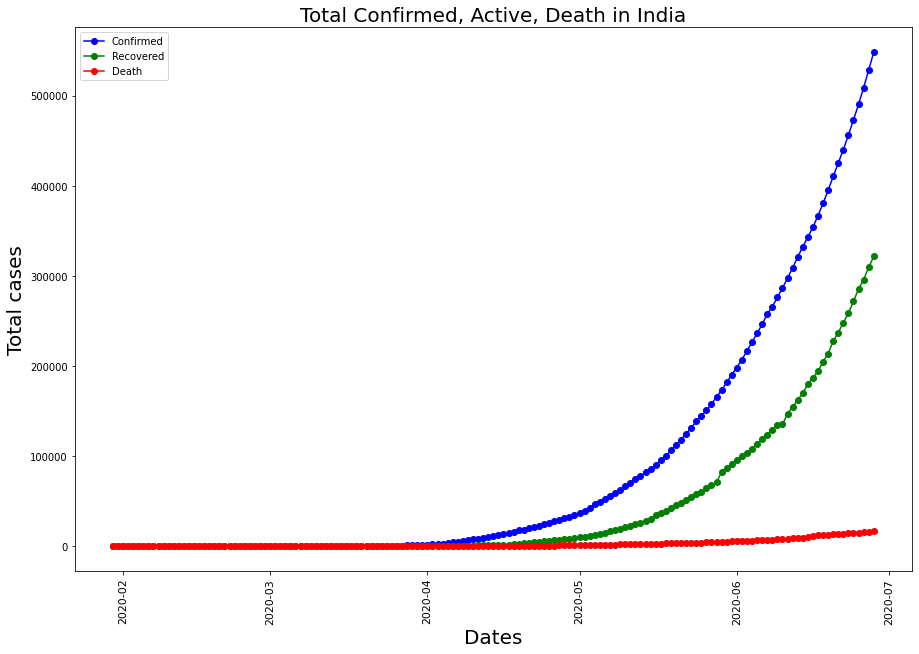

In [67]:
#Visualization of covid cases in India

dates_india = dates[8:]
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='India'].loc[:,'1/30/20':]
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'1/30/20':]
india_recovered = k.values.tolist()[0] 

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'r')
plt.legend()

# Visualization of covid cases in Iran

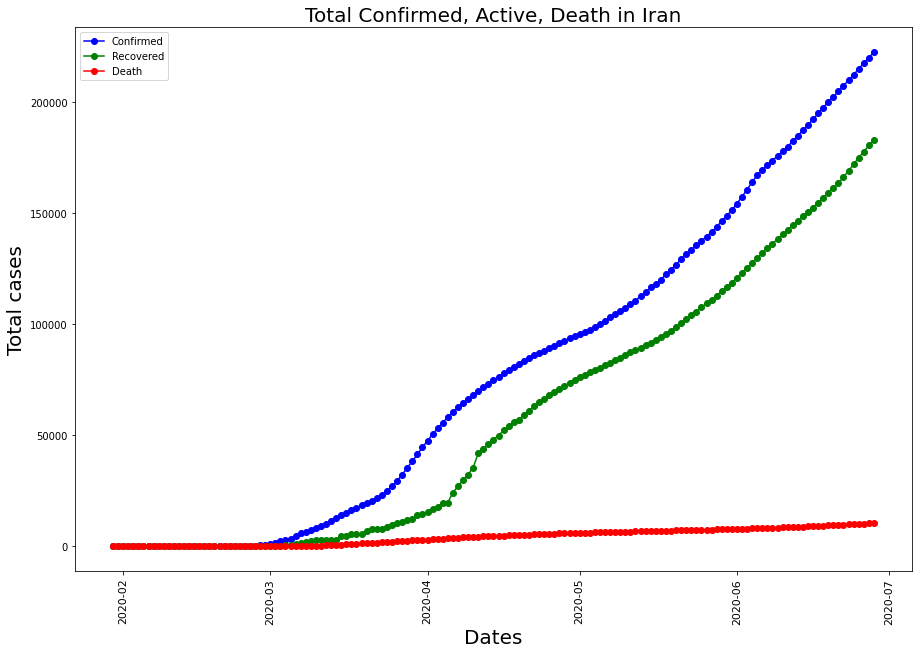

In [68]:
#Visualization of covid cases in Iran

dates_iran = dates[8:]
df1_iran = confirmed_df.groupby('Country/Region').sum().reset_index()
df2_iran = deaths_df.groupby('Country/Region').sum().reset_index()
df3_iran = recovered_df.groupby('Country/Region').sum().reset_index()

k = df1_iran[df1_iran['Country/Region']=='Iran'].loc[:,'1/30/20':]
iran_confirmed = k.values.tolist()[0] 

k = df2_iran[df2_iran['Country/Region']=='Iran'].loc[:,'1/30/20':]
iran_deaths = k.values.tolist()[0] 

k = df3_iran[df3_iran['Country/Region']=='Iran'].loc[:,'1/30/20':]
iran_recovered = k.values.tolist()[0] 

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in Iran" , fontsize = 20)

ax1 = plt.plot_date(y= iran_confirmed,x= dates_iran,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= iran_recovered,x= dates_iran,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= iran_deaths,x= dates_iran,label = 'Death',linestyle ='-',color = 'r')
plt.legend()

# If trend of COVID-19 in India is similar to Iran? Inference and Justification

No, there is a huge difference in trend between these two countries

*   Firstly, cases were witnessed in March for Iran whereas in India, it started from April.
*   Death rate of India is comparatively lower than Iran.
*   Statistically, India has more confirmed cases. This is because  India's population is large.
*   The confirmed:cured ratio is high for Iran when compared to India

# Use Prophet to forecast the data for next 10 days with 97% confidence interval

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


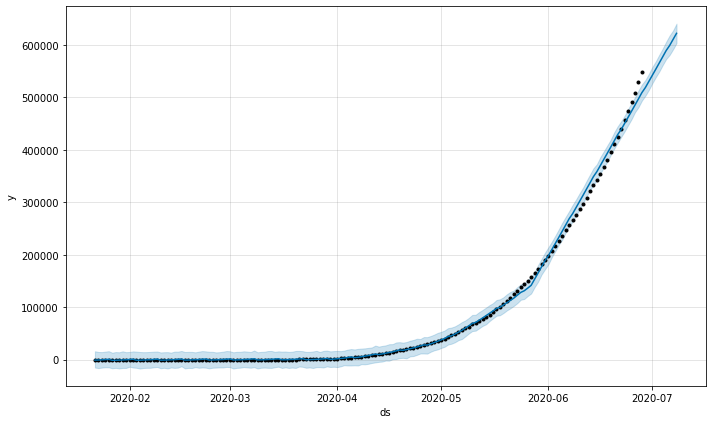

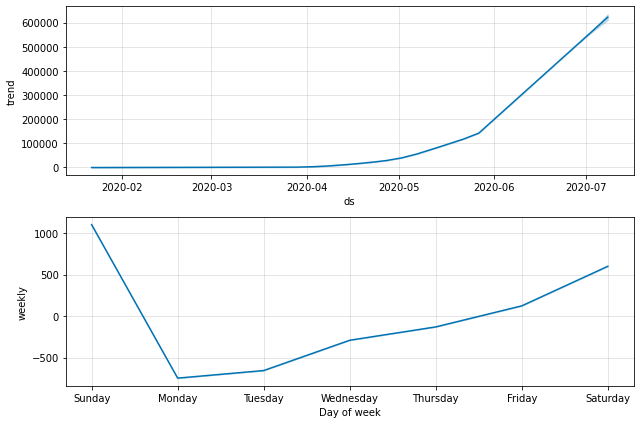

In [ ]:
#Prophet to forecast the data for next 10 days

from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

k = df1[df1['Country/Region']=='India'].loc[:,'1/22/20':]
india_confirmed = k.values.tolist()[0] 
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = india_confirmed

prop = Prophet(interval_width=0.97)
prop.fit(data)
future = prop.make_future_dataframe(periods=10)
#future.tail(15)

#predicting the future with date, and upper and lower limit of y value
forecast = prop.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

confirmed_forecast_plot = prop.plot(forecast)
confirmed_forecast_plot =prop.plot_components(forecast)